## Team ID = PTID-CDS-JAN 22 -1273A
### Project ID = PRCP-1003-Customer Transation Prediction
#### Problem Statement = Customer will Transact Or Not 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from collections import Counter

In [2]:
data=pd.read_csv('train(1).csv')
data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [3]:
df=data.drop('ID_code',axis=1)
df.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, target to var_199
dtypes: float64(200), int64(1)
memory usage: 306.7 MB


### Here this data file having more size. So we will decrease the size of the data set.

In [5]:
for column in df:
    if df[column].dtype=='float64':
        df[column]=pd.to_numeric(df[column],downcast='float')
    if df[column].dtype=='int64':   
        df[column]=pd.to_numeric(df[column],downcast='integer')
    



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, target to var_199
dtypes: float32(200), int8(1)
memory usage: 152.8 MB


In [7]:
df.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679973,-1.627628,10.715126,6.796523,11.078255,-5.065340,5.408961,16.545988,0.284159,...,3.234436,7.438449,1.927833,3.331773,17.993811,-0.142087,2.303355,8.908224,15.870864,-3.326542
std,0.300653,3.039990,4.049967,2.640832,2.043276,1.623114,7.863115,0.866585,3.418009,3.332576,...,4.559854,3.023208,1.478388,3.991934,3.135113,1.429341,5.454274,0.921603,3.010892,10.437832
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562599,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852798
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064724,4.836800
max,1.000000,20.315001,10.376800,19.353001,13.188300,16.671400,17.251600,8.447700,27.691799,10.151300,...,18.440901,16.716499,8.402400,18.281799,27.928801,4.272900,18.321501,12.000400,26.079100,28.500700


In [8]:
df.corr()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
target,1.000000,0.052390,0.050343,0.055870,0.011055,0.010915,0.030979,0.066731,-0.003025,0.019584,...,0.055973,0.047114,-0.042858,-0.017709,-0.022838,0.028285,0.023608,-0.035303,-0.053000,0.025434
var_0,0.052390,1.000000,-0.000544,0.006573,0.003801,0.001326,0.003046,0.006983,0.002429,0.004962,...,0.002752,0.000206,-0.005373,0.001616,-0.001514,0.002073,0.004386,-0.000753,-0.005776,0.003850
var_1,0.050343,-0.000544,1.000000,0.003980,0.000010,0.000303,-0.000902,0.003258,0.001511,0.004098,...,0.006627,0.003621,-0.002604,0.001153,-0.002557,-0.000785,-0.000377,-0.004157,-0.004861,0.002287
var_2,0.055870,0.006573,0.003980,1.000000,0.001001,0.000723,0.001569,0.000883,-0.000991,0.002648,...,0.000197,0.001285,-0.003400,0.000549,0.002104,-0.001070,0.003952,0.001078,-0.000877,0.003855
var_3,0.011055,0.003801,0.000010,0.001001,1.000000,-0.000322,0.003253,-0.000774,0.002500,0.003553,...,0.000151,0.002445,-0.001530,-0.001699,-0.001054,0.001206,-0.002800,0.001164,-0.001651,0.000506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
var_195,0.028285,0.002073,-0.000785,-0.001070,0.001206,0.003706,-0.001274,0.001244,0.001854,0.001396,...,0.004571,0.000870,-0.004745,-0.003143,-0.001201,1.000000,0.002517,-0.004170,-0.000536,0.002042
var_196,0.023608,0.004386,-0.000377,0.003952,-0.002800,0.000513,0.002880,0.005378,0.001045,-0.003242,...,-0.000847,0.002466,-0.001386,-0.005308,-0.005040,0.002517,1.000000,-0.000454,0.000253,0.000607
var_197,-0.035303,-0.000753,-0.004157,0.001078,0.001164,-0.000046,-0.000535,-0.003565,0.003466,-0.004583,...,-0.004974,0.000906,-0.000527,0.005068,0.000884,-0.004170,-0.000454,1.000000,0.001183,0.004991
var_198,-0.053000,-0.005776,-0.004861,-0.000877,-0.001651,-0.001821,-0.000953,-0.003025,0.000650,0.002950,...,-0.000153,-0.000067,0.003451,0.001646,0.003194,-0.000536,0.000253,0.001183,1.000000,-0.004731


# EDA

1. The data columns contain around 200  transaction done by the customer.
2. The data rows  contain around two lakh different type of customers.

Here we are going to predict  the outcome with respect to the target variables given in the dataset which has two classes where 

0---> means the customer will not transact in the future

1---> means the customer  will transact in the future 



#### The target column has compleatly imbalance.

([<matplotlib.patches.Wedge at 0x21c36360c40>,
 [Text(-1.0456376922886057, 0.34152864662478827, '0'),
  Text(1.0456377162707677, -0.3415285732000377, '1')],
 [Text(-0.5703478321574212, 0.18628835270442995, '89.95%'),
  Text(0.5703478452386005, -0.18628831265456602, '10.05%')])

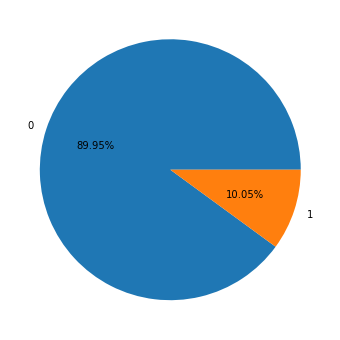

In [9]:
target_names=df.target.value_counts().index
target_values=df.target.value_counts().values
plt.figure(figsize=(6,6))
plt.pie(x=target_values,labels=target_names,autopct='%1.2f%%')

<AxesSubplot:xlabel='target', ylabel='count'>

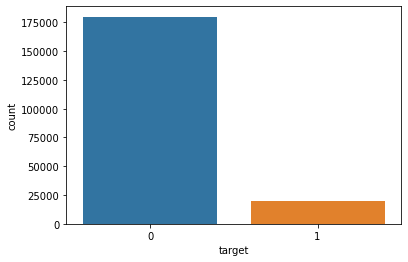

In [10]:
sns.countplot(df['target'])


*. From the above graph we can tell the dateset compleatly imbalance that means the customer will not transacted in future.

In [11]:
df['target'].value_counts()


0    179902
1     20098
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='Density'>

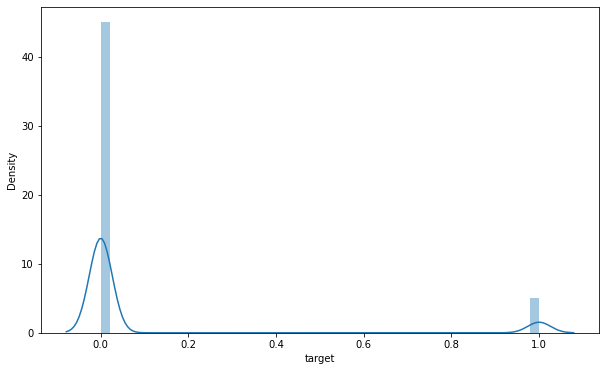

In [12]:
plt.figure(figsize=(10,6))
sns.distplot(df.target)

## Outlier Analysis: Box Plot

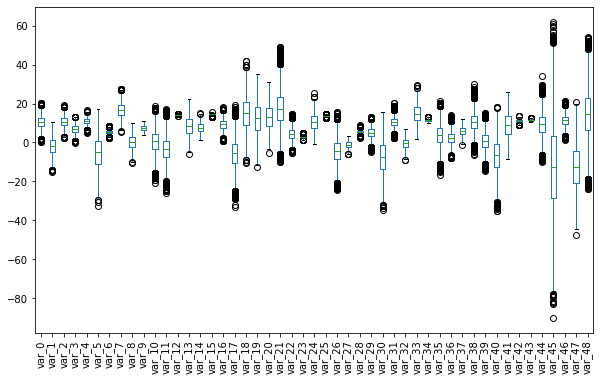

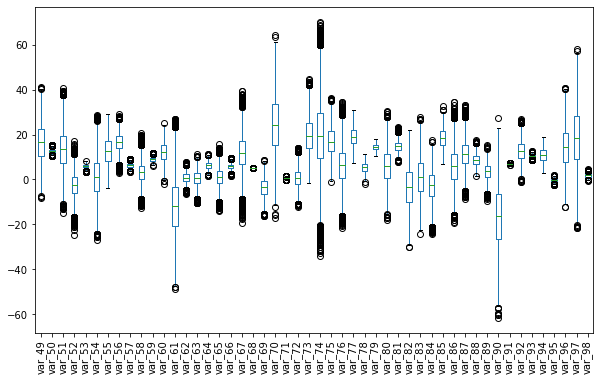

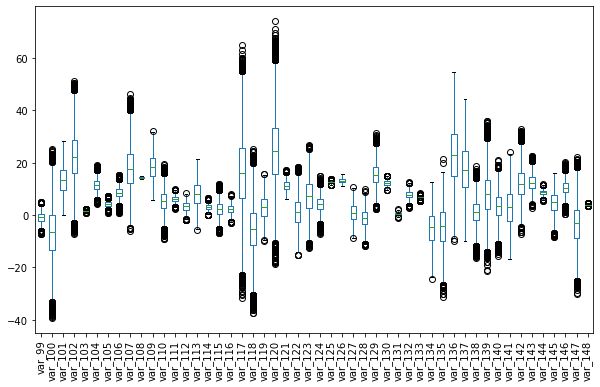

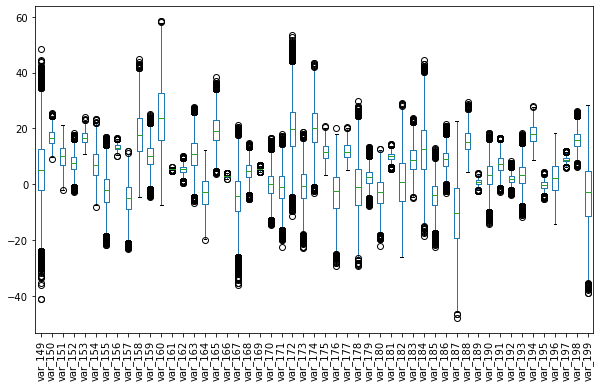

In [13]:
df.iloc[:,1:50].plot(kind='box',figsize=[10,6])
plt.xticks(rotation=90)
df.iloc[:,50:100].plot(kind='box',figsize=[10,6])
plt.xticks(rotation=90)
df.iloc[:,100:150].plot(kind='box',figsize=[10,6])
plt.xticks(rotation=90)
df.iloc[:,150:].plot(kind='box',figsize=[10,6])
plt.xticks(rotation=90)
plt.show()

#### Observation:
We follow tradionally finding the outliers in the variables,though we found outliers in the variables we are not going to remove or cap them in the dataset .since those variables have the values which are related to individual customer transaction.

### Data Preprocessing

In [14]:
x=df.iloc[:,1:]
y=df.iloc[:,0:1]

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=10)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((160000, 200), (40000, 200), (160000, 1), (40000, 1))

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from time import time
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score,confusion_matrix


classifier = [LogisticRegression(),GaussianNB()]


head = 2
for model in classifier[:head]:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred_train = model.predict(X_train)
    y_pred_test=model.predict(X_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tPrecison score test:", precision_score(y_test, y_pred_test))
    print("\tPrecison score train:", precision_score(y_train, y_pred_train))
    print("\t recall score test:", recall_score(y_test, y_pred_test))
    print("\t recall score train:", recall_score(y_train, y_pred_train))
    print("\taccuracy score Train:", accuracy_score(y_train, y_pred_train))
    print("\taccuracy score Test:", accuracy_score(y_test, y_pred_test))
    print("\tClassification report Test:", classification_report(y_test, y_pred_test))
    print("\tConfusion Matrix:\n",confusion_matrix(y_test,y_pred_test))

    print()

LogisticRegression()
	Training time: 7.738s
	Prediction time: 0.421s
	Precison score test: 0.6717877094972067
	Precison score train: 0.6796942852179955
	 recall score test: 0.24037981009495252
	 recall score train: 0.24310387673956263
	accuracy score Train: 0.91233125
	accuracy score Test: 0.91225
	Classification report Test:               precision    recall  f1-score   support

           0       0.92      0.99      0.95     35998
           1       0.67      0.24      0.35      4002

    accuracy                           0.91     40000
   macro avg       0.80      0.61      0.65     40000
weighted avg       0.90      0.91      0.89     40000

	Confusion Matrix:
 [[35528   470]
 [ 3040   962]]

GaussianNB()
	Training time: 0.728s
	Prediction time: 1.666s
	Precison score test: 0.6636402939904885
	Precison score train: 0.6758702191663085
	 recall score test: 0.3835582208895552
	 recall score train: 0.3908424453280318
	accuracy score Train: 0.9198625
	accuracy score Test: 0.918875
	Cla

1. Here comparing both Algorithems Navie bayes classifier gave  the better accuracy compared with Logistic regression .So we will select the Navie bayes for further implementation.

## RandomUnderSampling(For balance the data set)

In [17]:
from imblearn.under_sampling import RandomUnderSampler 
rus=RandomUnderSampler()
X_train_rus,Y_train_rus=rus.fit_resample(X_train,y_train)
start=time()
model_G=GaussianNB()
model_G_rus=model_G.fit(X_train_rus,Y_train_rus)
train_time=time()-start
start=time()
train_pred_rus=model_G_rus.predict(X_train)
test_pred_rus=model_G_rus.predict(X_test)
predict_time=time()-start
print("Training time: %0.3fs" % train_time)
print("Prediction time: %0.3fs" % predict_time)
print('accuracy_score_train',accuracy_score(train_pred_rus,y_train))
print('accuracy_score_test',accuracy_score(test_pred_rus,y_test))
print('precision_train',precision_score(train_pred_rus,y_train))
print('precision_test',precision_score(test_pred_rus,y_test))
print('recall_train',recall_score(train_pred_rus,y_train))
print('recall_test',recall_score(test_pred_rus,y_test))
print("Classification report Test:\n", classification_report(y_test, test_pred_rus))
print("Confusion Matrix:\n",confusion_matrix(y_test,test_pred_rus))

Training time: 0.112s
Prediction time: 1.113s
accuracy_score_train 0.81201875
accuracy_score_test 0.810575
precision_train 0.805168986083499
precision_test 0.8018490754622689
recall_train 0.3248038896268264
recall_test 0.3211247873511458
Classification report Test:
               precision    recall  f1-score   support

           0       0.97      0.81      0.89     35998
           1       0.32      0.80      0.46      4002

    accuracy                           0.81     40000
   macro avg       0.65      0.81      0.67     40000
weighted avg       0.91      0.81      0.84     40000

Confusion Matrix:
 [[29214  6784]
 [  793  3209]]


## ROC & AUC Curve

0.8066970806501855


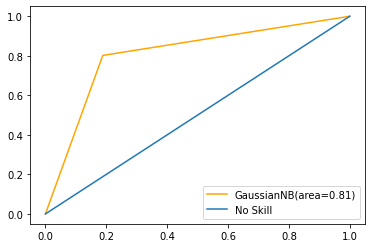

In [18]:
from sklearn.metrics import roc_curve,roc_auc_score
# roc curve for models
tpr,fpr,thresholds=roc_curve(y_test,test_pred_rus,pos_label=1)
auc_curve=roc_auc_score(y_test,test_pred_rus)
print(auc_curve)
plt.plot(tpr,fpr,color='orange',label='GaussianNB(area=%0.2f)'%auc_curve)
plt.plot([0,1],[0,1],label='No Skill')
plt.legend()
plt.show()

## PCA(Dimentionality Reduction)

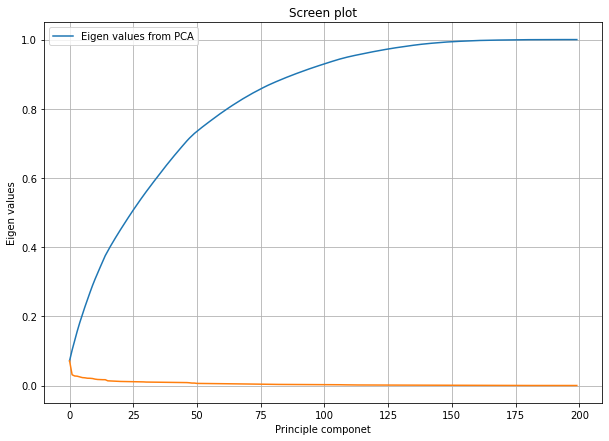

In [19]:

from sklearn.decomposition import PCA
pca=PCA().fit(x)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principle componet')
plt.ylabel('Eigen values')
plt.title('Screen plot')
plt.legend(['Eigen values from PCA'])
plt.grid(True)
plt.show()

* The Screen plot representing the higher information of the curve indicates that 200 columns of the dataset compresssed to 150 columns. So we will take 150 columns from dataset for futher analysis by appling PCA.

In [20]:
from sklearn.decomposition import PCA
pca=PCA(n_components=150)
w=pca.fit_transform(x)
pca_df=pd.DataFrame(data=w,columns=list(np.arange(0,150)))
final_df=pd.concat([pca_df,y],axis=1)
final_df.head()

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,target
0,-5.606612,-23.554306,-1.899567,5.221610,2.466574,-8.622265,2.713383,-15.072203,11.416188,1.583014,...,2.428553,1.669507,-1.141550,-0.251465,-0.660626,3.149835,-0.840378,2.953538,-1.701777,0
1,34.878029,11.469420,-3.760445,-19.273907,-8.542719,6.984274,-15.539472,-2.990456,8.116706,19.064703,...,-2.620801,1.328075,-0.521808,-0.153678,0.600122,3.844910,0.978164,-1.359226,-1.726345,0
2,-4.790344,-0.336636,11.357072,8.533345,1.328955,-3.218024,22.019432,-1.661996,-4.055370,6.218169,...,2.081759,-1.297709,0.271179,-2.506552,-0.669378,3.796352,2.850950,-0.923088,-2.484725,0
3,11.875344,14.050433,24.017006,-4.419301,0.372576,5.805818,20.132496,12.235253,-1.442406,-14.343854,...,0.190536,-0.186190,-2.638562,1.449168,1.099740,-2.160285,-1.877083,-2.486634,0.017986,0
4,52.713112,24.315292,4.333560,23.857813,-17.868006,16.348734,-15.372873,11.752598,-18.458326,-14.795757,...,-0.591575,0.629295,0.572061,2.883025,-2.275892,-4.472810,-0.094899,-1.530699,1.550775,0


In [28]:
x1=final_df.iloc[:,:-1]
y1=final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X1_train,X1_test,y1_train,y1_test=train_test_split(x1,y1,random_state=10,test_size=0.30)

In [32]:
model_G=GaussianNB()
start=time()
model_G=model_G.fit(X1_train,y1_train)
train_time=time()-start
start=time()
pred_train_G=model_G.predict(X1_train)
pred_test_G=model_G.predict(X1_test)
prediction_time=time()-start
print('Training time:%0.3fs'%train_time)
print('prediction time:%0.3fs'%prediction_time)
print('accuracy_score_train',accuracy_score(pred_train_G,y1_train))
print('accuracy_score_test',accuracy_score(pred_test_G,y1_test))
print('precision_train',precision_score(pred_train_G,y1_train))
print('precision_test',precision_score(pred_test_G,y1_test))
print('recall_train',recall_score(pred_train_G,y1_train))
print('recall_test',recall_score(pred_test_G,y1_test))
print("Classification report Test:\n", classification_report(y1_test, pred_test_G))
print("Confusion Matrix:\n",confusion_matrix(y1_test,pred_test_G))

Training time:0.244s
prediction time:0.650s
accuracy_score_train 0.9136142857142857
accuracy_score_test 0.9124833333333333
precision_train 0.21743145333143912
precision_test 0.20780730897009966
recall_train 0.7397293378443692
recall_test 0.7218695903058281
Classification report Test:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     53980
           1       0.72      0.21      0.32      6020

    accuracy                           0.91     60000
   macro avg       0.82      0.60      0.64     60000
weighted avg       0.90      0.91      0.89     60000

Confusion Matrix:
 [[53498   482]
 [ 4769  1251]]


### Under Sampling (After PCA )

In [23]:
from imblearn.under_sampling import RandomUnderSampler 
rus=RandomUnderSampler()
X1_train_rus,Y1_train_rus=rus.fit_resample(X1_train,y1_train)
start=time()
model_G=GaussianNB()
model_G_rus=model_G.fit(X1_train_rus,Y1_train_rus)
train_time=time()-start
start=time()
pred_train_rus=model_G_rus.predict(X1_train)
pred_test_rus=model_G_rus.predict(X1_test)
predict_time=time()-start
print("Training time: %0.3fs" % train_time)
print("Prediction time: %0.3fs" % predict_time)
print('accuracy_score_train',accuracy_score(pred_train_rus,y1_train))
print('accuracy_score_test',accuracy_score(pred_test_rus,y1_test))
print('precision_train',precision_score(pred_train_rus,y1_train))
print('precision_test',precision_score(pred_test_rus,y1_test))
print('recall_train',recall_score(pred_train_rus,y1_train))
print('recall_test',recall_score(pred_test_rus,y1_test))
print("Classification report Test:\n", classification_report(y1_test, pred_test_rus))
print("Confusion Matrix:\n",confusion_matrix(y1_test,pred_test_rus))

Training time: 0.049s
Prediction time: 0.686s
accuracy_score_train 0.7805357142857143
accuracy_score_test 0.7785333333333333
precision_train 0.7675806222474784
precision_test 0.7528239202657807
recall_train 0.28244334666353016
recall_test 0.2774920401665442
Classification report Test:
               precision    recall  f1-score   support

           0       0.97      0.78      0.86     53980
           1       0.28      0.75      0.41      6020

    accuracy                           0.78     60000
   macro avg       0.62      0.77      0.63     60000
weighted avg       0.90      0.78      0.82     60000

Confusion Matrix:
 [[42180 11800]
 [ 1488  4532]]


* I have applied here Random Under Sampling after PCA. We can observe here the accuracy of the model is very less after PCA. So dimentionality reduction does'nt give good accuracy. So PCA not important here.

## ROC & AUC Curve (After PCA)

0.7671122194882072


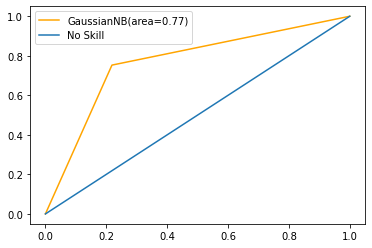

In [24]:
from sklearn.metrics import roc_curve,roc_auc_score
# roc curve for models
tpr,fpr,thresholds=roc_curve(y1_test,pred_test_rus,pos_label=1)
auc_curve=roc_auc_score(y1_test,pred_test_rus)
print(auc_curve)
plt.plot(tpr,fpr,color='orange',label='GaussianNB(area=%0.2f)'%auc_curve)
plt.plot([0,1],[0,1],label='No Skill')
plt.legend()
plt.show()

#### Observation:
* From the above graph the ROC-AUC curve better after appling PCA. But before PCA ROC-AUC curve having score.ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. By analogy, the Higher the AUC, the better the model is at distinguishing between customers will not transact and will Transact in future.The ROC curve is plotted with TPR against the FPR where TPR is on the y-axis and FPR is on the x-axis. 

### Pickling

In [39]:
model_G=GaussianNB()
start=time()
model_G=model_G.fit(X1_train,y1_train)
train_time=time()-start
start=time()
pred_G=model_G.predict(X1_test)
prediction_time=time()-start
print('Training time:%0.3fs'%train_time)
print('prediction time:%0.3fs'%prediction_time)
print('accuracy_score_test',accuracy_score(pred_G,y1_test))
print("Confusion Matrix:\n",confusion_matrix(y1_test,pred_test_G))

Training time:0.250s
prediction time:0.162s
accuracy_score_test 0.9124833333333333
Confusion Matrix:
 [[53498   482]
 [ 4769  1251]]


## Conclusion:
1. In terms of working Theory, looking into accuracy and Time, I choose Navie Bayes Classifier , which will work best for the given Dataset.
2. From the confusion matrix we can conclude that This dataset having less no of False Positives and more no of False Negatives.
3. ROC-AUC hava gave better performance in this classification problem.
4. From this Dataset we can conclude that the model will perfectly distinguish between the customers will transact and will not transact in future.